In [10]:
!jupyter nbconvert --to markdown 5_1_4_Exercises.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook 5_1_4_Exercises.ipynb to markdown
[NbConvertApp] Support files will be in 5_1_4_Exercises_files/
[NbConvertApp] Making directory 5_1_4_Exercises_files
[NbConvertApp] Writing 14178 bytes to 5_1_4_Exercises.md


# 1. Show that adding layers to a linear deep network, i.e., a network without nonlinearity $\delta$ can never increase the expressive power of the network. Give an example where it actively reduces it.

## 1.1 never increase

Let's consider a linear deep network without nonlinearity:

$$f(x) = W_L \cdot (W_{L-1} \cdot (\ldots (W_2 \cdot (W_1 \cdot x)) \ldots)) $$

Here, each $W_i$ represents the weight matrix for the $i$-th layer, and $x$ is the input. The composition of linear transformations is still a linear transformation. This is because if you apply a linear transformation (matrix multiplication) to a linear combination of variables, the result is still a linear combination of variables.

Mathematically, for any input vectors $a$ and $b$ and scalars $\alpha$ and $\beta$, a linear transformation satisfies:

$$T(\alpha a + \beta b) = \alpha T(a) + \beta T(b) $$

If we apply this to our linear deep network, where each layer is a linear transformation $W_i \cdot$, we get:

$$f(\alpha x + \beta y) = W_L \cdot (W_{L-1} \cdot (\ldots (W_2 \cdot (\alpha W_1 \cdot x + \beta W_1 \cdot y)) \ldots)) 
 = \alpha \cdot (W_L \cdot (W_{L-1} \cdot (\ldots (W_2 \cdot (W_1 \cdot x)) \ldots))) + \beta \cdot (W_L \cdot (W_{L-1} \cdot (\ldots (W_2 \cdot (W_1 \cdot y)) \ldots))) 
 = \alpha f(x) + \beta f(y) $$
 As you can see, the network's response to a linear combination of inputs is still a linear combination of the network's responses to individual inputs. This property doesn't change as you add more layers to the network.

## 1.2 Actively reduce

To provide an example where adding layers without nonlinearity actively reduces expressive power, let's consider a simple case with just two layers. We have an input $x$ and two weight matrices $W_1$ and $W_2$, where $W_1$ is $n \times m$ and $W_2$ is $m \times p$ and $p \lt m$. The output without nonlinearity would be:

$$f(x) = W_2 \cdot (W_1 \cdot x) $$

In this case, no matter how many layers you add, the entire network can be represented as a single linear transformation $W_2 \cdot W_1$. This is equivalent to a linear transformation with a single weight matrix $W_2 \cdot W_1$, effectively reducing the expressive power to that of a single linear layer.

# 2. Compute the derivative of the pReLU activation function.

The Parametric Rectified Linear Unit (pReLU) activation function is defined as follows:

$$f(x) = \begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{otherwise}
\end{cases} $$

To compute the derivative of the pReLU function, we need to consider two cases: when $x > 0$ and when $x \leq 0$.

1. When $x > 0$:

In this case, the function is simply the identity function, so its derivative is 1.

$$\frac{df(x)}{dx} = 1 $$

2. When $x \leq 0$:

In this case, the function becomes $f(x) = \alpha x$, so its derivative is $\alpha$.

$$ \frac{df(x)}{dx} = \alpha $$

Therefore, the derivative of the pReLU activation function can be expressed as a piecewise function:

$$ \frac{df(x)}{dx} = \begin{cases} 
1 & \text{if } x > 0 \\
\alpha & \text{otherwise}
\end{cases} $$

# 3. Compute the derivative of the Swish activation function $xsigmoid(\beta{x})$.

The Swish activation function is defined as:

￥￥ f(x) = x \cdot \text{sigmoid}(\beta x) $$

Where $\beta$ is a scalar parameter.

To compute the derivative of the Swish activation function, we'll use the product rule of differentiation, which states that if $u(x)$ and $v(x)$ are two differentiable functions of $x$, then the derivative of their product $u(x) \cdot v(x)$ with respect to $x$ is given by:

$$ \frac{d}{dx}(u(x) \cdot v(x)) = u'(x) \cdot v(x) + u(x) \cdot v'(x) $$

Let $u(x) = x$ and $v(x) = \text{sigmoid}(\beta x)$, then their derivatives are:

$$ u'(x) = 1 $$
$$ v'(x) = \beta \cdot \text{sigmoid}(\beta x) \cdot (1 - \text{sigmoid}(\beta x)) $$

Now, applying the product rule:

$$ \frac{d}{dx}(f(x)) = u'(x) \cdot v(x) + u(x) \cdot v'(x) 
 = 1 \cdot (\text{sigmoid}(\beta x)) + x \cdot \left(\beta \cdot \text{sigmoid}(\beta x) \cdot (1 - \text{sigmoid}(\beta x))\right) 
= \text{sigmoid}(\beta x) + x \cdot \beta \cdot \text{sigmoid}(\beta x) \cdot (1 - \text{sigmoid}(\beta x)) $$

Therefore, the derivative of the Swish activation function $f(x)$ with respect to $x$ is:

$$f'(x) = \text{sigmoid}(\beta x) + x \cdot \beta \cdot \text{sigmoid}(\beta x) \cdot (1 - \text{sigmoid}(\beta x))$$

# 4. Show that an MLP using only ReLU (or pReLU) constructs a continuous piecewise linear function.

An MLP (Multi-Layer Perceptron) using only the ReLU (Rectified Linear Unit) or pReLU (Parametric Rectified Linear Unit) activation functions constructs a continuous piecewise linear function. Let's consider the ReLU activation function for this explanation.

The ReLU activation function is defined as:

$$ \text{ReLU}(x) = \max(0, x) $$

In an MLP, each neuron's output is calculated by applying an affine transformation (weight multiplication and bias addition) followed by the ReLU activation. The key property of the ReLU activation is that it is a piecewise linear function.

When you consider a single neuron with ReLU activation, it essentially performs two operations:

1. For inputs $x$ where $x > 0$, the output is $x$.
2. For inputs $x$ where $x \leq 0$, the output is 0.

The first operation ($x > 0$) is a linear transformation with a slope of 1 (output is $y = x$), and the second operation ($x \leq 0$) is a constant zero (output is $y = 0$).

By composing multiple such neurons together in an MLP architecture, you are effectively creating a composition of linear transformations and constant zeros. Since each ReLU neuron's operation is piecewise linear, the combination of these operations will also be a piecewise linear function.

The breakpoints or "kinks" in the piecewise linear function occur where the activations of the neurons change from 0 to the actual linear operation (when input \(x\) crosses 0). As you move from one layer to another in the network, you are effectively combining multiple piecewise linear functions, resulting in a more complex piecewise linear function overall.

The pReLU activation function behaves similarly, but it introduces a learnable parameter for the negative slope, allowing a continuous range of slopes for the linear portion when $x$ is negative.

In summary, an MLP using only ReLU (or pReLU) activation functions constructs a continuous piecewise linear function because the operations performed by these activation functions are individually piecewise linear, and the composition of these operations across layers results in a piecewise linear function that approximates complex mappings between inputs and outputs.

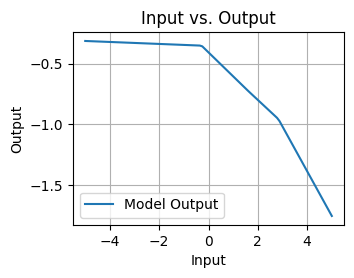

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 3),  # Linear layer with 1 input feature and 3 output features
    nn.ReLU(),        # ReLU activation function
    nn.Linear(3, 1)   # Linear layer with 3 input features and 1 output feature
)

# Input data
x_input = np.linspace(-5, 5, 100).reshape(-1, 1)  # Generate 100 input values

# Convert numpy array to PyTorch tensor
x_tensor = torch.Tensor(x_input)

# Get the model's predictions
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

# Plot the input and output
plt.figure(figsize=(3.5, 2.5))
plt.plot(x_input, y_pred, label='Model Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Input vs. Output')
plt.legend()
plt.grid()
plt.show()

# 5. Sigmoid and tanh are very similar.
- Show that $tanh(x)+1 = 2sigmoid(2x)$.
- Prove that the function classes parametrized by both nonlinearities are identical. Hint: affine layers have bias terms, too.

## 5.1 Show that $tanh(x) + 1 = 2 \cdot sigmoid(2x)$

$$tanh(x) + 1 = \frac{e^x - e^{-x}}{e^x + e^{-x}} + 1
 = \frac{e^x - e^{-x} + e^x + e^{-x}}{e^x + e^{-x}}
 = \frac{2e^x}{e^x + e^{-x}}$$

Multiplying both numerator and denominator by $e^x$:
$$tanh(x) + 1 = \frac{2}{1 + e^{-2x}}$$
Using the definition of the sigmoid function:
$$tanh(x) + 1 = 2 \cdot sigmoid(2x)$$
This concludes the proof.

## 5.2 Prove that the function classes parametrized by both nonlinearities are identical

$ \tanh(x) = 2sigmoid(2x) - 1 $ illustrates that the hyperbolic tangent function $\tanh$ can be expressed in terms of the sigmoid function $sigmoid$  with a linear transformation.

# 6. Assume that we have a nonlinearity that applies to one minibatch at a time, such as the batch normalization (Ioffe and Szegedy, 2015). What kinds of problems do you expect this to cause?

When a nonlinearity, such as batch normalization, is applied to one minibatch at a time instead of individually to each input sample, it can introduce several issues and challenges. Batch normalization is specifically designed to operate on a per-feature basis within a minibatch, and applying it differently can lead to problems in training and generalization. Here are some problems that can arise:

1. **Loss of Statistical Robustness:** Batch normalization relies on the statistical properties of each feature within a minibatch to normalize the activations. If you apply it to a single minibatch, the computed mean and variance can be highly sensitive to the specific distribution of that minibatch, leading to instability in the training process.

2. **Bias and Variance:** Treating each minibatch as a separate distribution can lead to increased bias and variance in the network's learned parameters. This can affect generalization performance and lead to overfitting.

3. **Reduced Generalization:** Applying batch normalization per minibatch can result in a network that generalizes poorly to unseen data. The network may become overly specialized to the specific statistics of each minibatch, making it less robust to variations in input distribution.

4. **Training Instability:** Training with inconsistent normalization across minibatches can lead to training instability, slower convergence, and difficulty in finding a good solution.

5. **Validation and Test Mismatch:** If the normalization strategy is not consistent between training and validation/testing, the model's performance during these stages can differ significantly, leading to poor validation performance and over-optimistic test results.

6. **Inaccurate Gradients:** The gradients computed during backpropagation might not accurately represent the true gradient of the loss due to the varying normalization statistics across different minibatches. This can hinder the training process and result in slower convergence or convergence to suboptimal solutions.

7. **Non-reproducibility:** The randomness introduced by different minibatches' normalization can make the training process non-reproducible, as the same training data could lead to different model outcomes depending on the order of minibatches.

8. **Model Sensitivity:** The model's behavior could be sensitive to the order of the data samples within a minibatch, which is not ideal for neural networks aiming to capture invariant features.

In summary, applying nonlinearity like batch normalization to a single minibatch at a time can lead to issues related to statistical robustness, generalization, training stability, and reproducibility. To mitigate these problems, it's best to follow the established practice of applying such normalization techniques within a minibatch, ensuring consistent and effective normalization across all training samples.

# 7. Provide an example where the gradients vanish for the sigmoid activation function.

The vanishing gradient problem can occur with sigmoid activation functions when the gradients become extremely small as the input moves toward the tails of the sigmoid curve (far from the origin). This phenomenon is particularly prominent when stacking multiple layers with sigmoid activations in deep neural networks. Let's consider a simple example to illustrate the vanishing gradient problem with the sigmoid activation function.

Suppose we have a deep neural network with multiple hidden layers, all using the sigmoid activation function:

$$ a^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}} $$

Let's assume that the input to the first hidden layer is $z^{(1)} = 10$. Now, let's calculate the derivative of the loss with respect to the input of the first hidden layer, $dz^{(1)}$, assuming that the loss function is a simple squared error loss.

$$ L = \frac{1}{2}(a^{(n)} - y)^2 $$

Where $n$ is the index of the last layer and $y$ is the target output.

The derivative of the loss with respect to $z^{(1)}$ can be calculated using the chain rule:

$$ \frac{dL}{dz^{(1)}} = \frac{dL}{da^{(n)}} \cdot \frac{da^{(n)}}{dz^{(n)}} \cdot \frac{dz^{(n)}}{da^{(n-1)}} \cdot \ldots \cdot \frac{da^{(2)}}{dz^{(2)}} \cdot \frac{dz^{(2)}}{da^{(1)}} \cdot \frac{da^{(1)}}{dz^{(1)}} $$

Since all the hidden layers use sigmoid activation, we can substitute the derivative of the sigmoid function:

$$ \frac{d\sigma(z)}{dz} = \sigma(z) \cdot (1 - \sigma(z)) $$

Now, consider the derivative of the sigmoid function when its input is large ($z^{(1)} = 10$ in this case):

$$ \frac{d\sigma(10)}{dz} = \sigma(10) \cdot (1 - \sigma(10)) \approx \frac{1}{1 + e^{-10}} \cdot \left(1 - \frac{1}{1 + e^{-10}}\right) \approx \frac{1}{1 + e^{10}} \cdot \frac{e^{10}}{1 + e^{10}} \approx \frac{1}{1 + e^{10}} \cdot 1 \approx 0 $$

As you can see, the gradient of the sigmoid function becomes very close to zero for large positive inputs. When you multiply these small gradients across multiple layers during backpropagation, you end up with vanishing gradients. This can cause the weights in the lower layers of the network to be updated very slowly, leading to slow convergence or getting stuck in training.

This example illustrates the vanishing gradient problem associated with the sigmoid activation function, which can negatively impact the training of deep neural networks. This problem led to the development of other activation functions like ReLU, which do not suffer as severely from the vanishing gradient issue.